##  Домашнее задание к занятию "Основы нейронных сетей"


## Задание 1

Реализуйте обучение нейронной сети из одного нейрона для задачи предсказания стоимости квартир [boston house prices](https://www.kaggle.com/vikrishnan/boston-house-prices) или [california housing prices](https://www.kaggle.com/datasets/camnugent/california-housing-prices) с использованием pytorch.

Инструкция к выполнению задания:
* Загрузите и подготовьте данные
* Разделите данные на test и train
* Создайте класс модели
* Обучите модель на train данных
* Проверьте качество модели на тестовых данных



### Импорт библиотек

In [ ]:
import torch
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.nn.functional as F

### Загрузка данных

In [ ]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
len(column_names)

14

In [ ]:
df = pd.read_csv('/content/housing.csv', header=None, delimiter=r"\s+", names=column_names)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [ ]:
df.shape

(506, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [ ]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
# перемешивание данных
n = len(df.index)
print(n)
shuffled_indices = np.random.permutation(n)
df = df.iloc[shuffled_indices]
df.head()

506


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
122,0.09299,0.0,25.65,0,0.581,5.961,92.9,2.0869,2,188.0,19.1,378.09,17.93,20.5
109,0.26363,0.0,8.56,0,0.520,6.229,91.2,2.5451,5,384.0,20.9,391.23,15.55,19.4
140,0.29090,0.0,21.89,0,0.624,6.174,93.6,1.6119,4,437.0,21.2,388.08,24.16,14.0
462,6.65492,0.0,18.10,0,0.713,6.317,83.0,2.7344,24,666.0,20.2,396.90,13.99,19.5
299,0.05561,70.0,2.24,0,0.400,7.041,10.0,7.8278,5,358.0,14.8,371.58,4.74,29.0


In [ ]:
# стандартизация данных
trans = StandardScaler()
data = trans.fit_transform(df)
data = data.astype(np.float32)
data

array([[-0.40969586, -0.48772237,  2.1176147 , ...,  0.23481235,
         0.7396882 , -0.22124551],
       [-0.38983795, -0.48772237, -0.3759761 , ...,  0.37888402,
         0.40607458, -0.34096673],
       [-0.38666445, -0.48772237,  1.5689955 , ...,  0.34434628,
         1.6129708 , -0.9286891 ],
       ...,
       [-0.41248882, -0.48772237,  2.1176147 , ...,  0.35607815,
         0.24066952, -0.0579893 ],
       [-0.4133849 ,  0.370669  , -1.139082  , ...,  0.2236287 ,
        -1.3517047 ,  2.55411   ],
       [-0.3960348 ,  0.370669  , -1.139082  , ...,  0.44105193,
        -1.0937849 ,  1.3677816 ]], dtype=float32)

In [ ]:
data = data.astype(np.float32)
data = torch.tensor(data)

In [ ]:
# разделение на признаки и таргет
x, y = data[:, :-1], data[:, -1]

In [ ]:
y.shape

torch.Size([506])

### Разделение данных на тренировочную и тестовую выборки

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state = 42)

In [ ]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

torch.Size([404, 13]) torch.Size([404])
torch.Size([102, 13]) torch.Size([102])


In [ ]:
# класс для формирования датасета на вход сети
class NpDataset(Dataset):
    def __init__(self, data, label):
        assert len(data) == len(label)
        self.data = data
        self.label = label

    def __getitem__(self, index):
        return self.data[index], self.label[index]

    def __len__(self):
        return len(self.label)

In [ ]:
train_dataset = NpDataset(x_train, y_train)
test_dataset = NpDataset(x_test, y_test)

train_dataloader = DataLoader(
    train_dataset,
    batch_size=10,
    shuffle=False
)
test_dataloader = DataLoader(
    test_dataset,
    batch_size=64,
    shuffle=False
)

# len(train_dataloader.dataset)
# len(test_dataloader.dataset)

In [ ]:
for x in test_dataset:
    print(x)
    break

(tensor([-0.3754, -0.4877,  2.1176, -0.2726,  0.2272, -0.9568,  0.9610, -0.9687,
        -0.8679, -1.3081,  0.2980,  0.0287,  2.0475]), tensor(-0.7437))


In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


### Класс для создания сети

In [ ]:
# класс модели, один слой, 13 признаков
class NetBoston(nn.Module):
    def __init__(self):
        super(NetBoston, self).__init__()

        self.fn1 = nn.Linear(13, 25)
        self.fn2 = nn.Linear(25, 50)
        self.fn3 = nn.Linear(50, 100)
        self.fn4 = nn.Linear(100, 1)

    def forward(self, x):
        x = F.relu(self.fn1(x))
        x = F.relu(self.fn2(x))
        x = F.relu(self.fn3(x))
        x = self.fn4(x)
        return x



model = NetBoston()
model.to(device)

NetBoston(
  (fn1): Linear(in_features=13, out_features=25, bias=True)
  (fn2): Linear(in_features=25, out_features=50, bias=True)
  (fn3): Linear(in_features=50, out_features=100, bias=True)
  (fn4): Linear(in_features=100, out_features=1, bias=True)
)

In [ ]:
# инициализация функции потерь и оптимизатора
loss_fn = nn.MSELoss(reduction='mean')
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [ ]:
def train():
    model.train()

    for x, y in train_dataloader:
        x = x.to(device)
        y = y.to(device)
        n = x.size(0)

        optimizer.zero_grad()
        score = model(x)
        loss = loss_fn(score, y)
        history.append()


        loss.backward()
        optimizer.step()


    return loss

In [ ]:
def evaluate():
    model.eval()

    with torch.no_grad():
        for x, y in test_dataloader:
            x = x.to(device)
            y = y.to(device)
            n = x.size(0)
            score = model(x)
            loss = loss_fn(score, y)

    return loss

In [ ]:
max_epochs = 1000
history = []
for epoch in range(max_epochs):
    tr_loss = train()
    eva_loss = evaluate()
    history.append(tr_loss)
    print(f'[{epoch}/{max_epochs}] Train loss:{tr_loss:.4f}  - Test loss:{eva_loss:.4f}')

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
history[-1].detach().numpy()

array(0.23504883, dtype=float32)

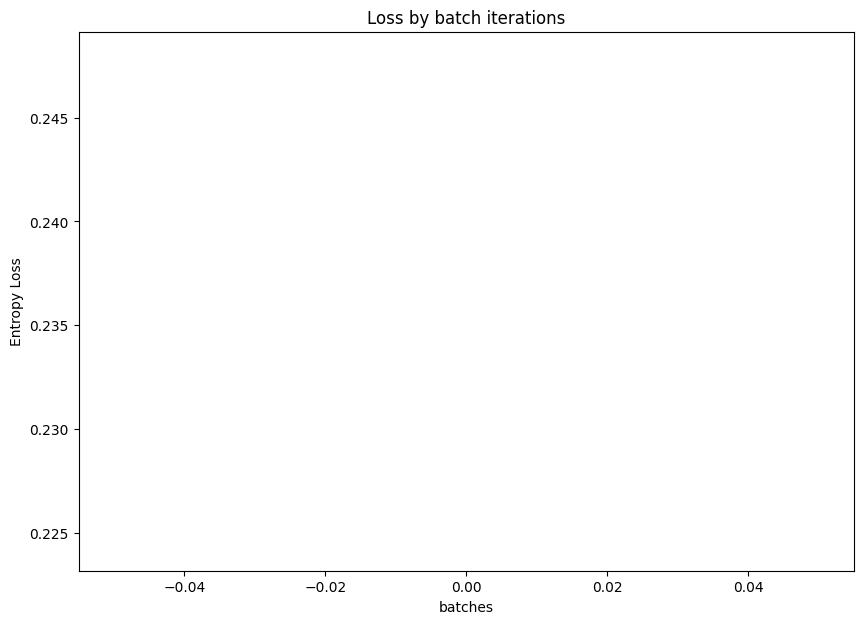

In [ ]:
plt.figure(figsize=(10, 7))

plt.plot(history[0].detach().numpy())

plt.title('Loss by batch iterations')
plt.ylabel('Entropy Loss')
plt.xlabel('batches')

plt.show()